### binary classification

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn import metrics
from collections import OrderedDict
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
A=np.loadtxt("data/data_banknote_authentication.txt",delimiter=',')
Total_data=len(A)
X=A[:,0:4]
f1=X[:,0]
f2=X[:,1]
f3=X[:,2]
f4=X[:,3]
y=A[:,4]

colors=['green','blue']
df=pd.DataFrame(A,columns=['f1','f2','f3','f4','Class'])
grid=sns.pairplot(data=df,kind='scatter',vars=['f1','f2','f3','f4'],hue='Class',diag_kind='kde',palette= colors)
plt.show()

In [ ]:
ax = sns.boxplot(x='Class', y="f1", data=df,hue='Class')
plt.figure()
ax1 = sns.boxplot(x='Class', y="f2", data=df,hue='Class')
plt.figure()
ax2 = sns.boxplot(x='Class', y="f3", data=df,hue='Class')
plt.figure()
ax3 = sns.boxplot(x='Class', y="f4", data=df,hue='Class')
plt.figure()

In [16]:
def splitData(df, headSize):
    """
    This function splits the data based on the head size .
    """
    hd = df.head(headSize)
    tl = df.tail(len(df)-headSize)
    return hd, tl

def getData(a,b):
    """
    This function combines 2 dataframes.
    """
    x = pd.concat([a, b], sort=False)
    y = x['Class']
    return x,y

data_0 = df.loc[df['Class']==0]
test_0, train_0 = splitData(data_0, 200)
data_1 = df.loc[df['Class']==1]
test_1, train_1 = splitData(data_1, 200)
X_tr, Y_train = getData(train_0, train_1)
X_test, Y_test = getData(test_0, test_1)

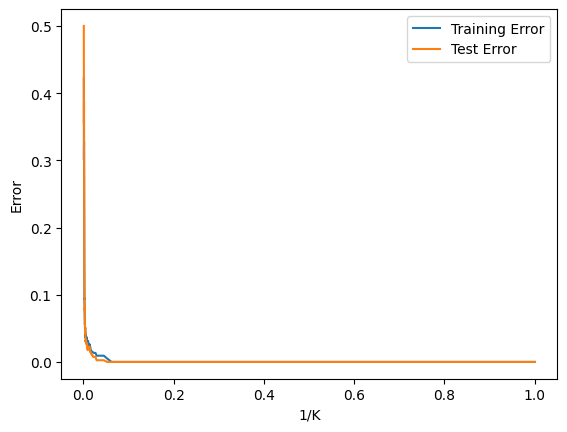

The optimal value of k (highest) is 19


Text(0.5, 1.0, 'Error vs k')

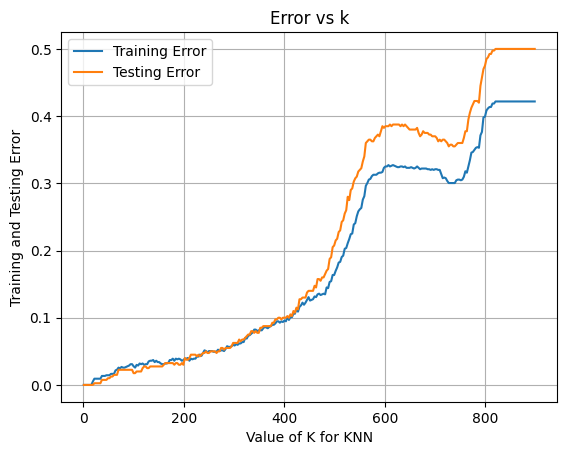

In [17]:
neighbors = list(range(1,901,3))
kinv = []
k2=[]
training_error = []
test_error = []
best_error = 1
X_train = X_tr.drop(columns = ['Class'])
X_test = X_test.drop(columns = ['Class'])

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, p=2)
    knn.fit(np.array(X_train), np.array(Y_train))
    test_pred = knn.predict(X_test)
    train_pred = knn.predict(X_train)
    tr_error = 1 - metrics.accuracy_score(Y_train, train_pred)
    t_error = 1 - metrics.accuracy_score(Y_test, test_pred)
    training_error.append(tr_error)
    test_error.append(t_error)
    if t_error <= best_error:
        best_error = t_error
        kstar = k
    kinv.append(1/k)
    k2.append(k)

plt.plot(kinv, training_error, label= 'Training Error')
plt.plot(kinv, test_error, label= 'Test Error')
plt.xlabel('1/K')
plt.ylabel('Error')
plt.legend()
plt.show()
print("The optimal value of k (highest) is %d" % kstar)

#plt.figure(figsize=(15,10))
plt.plot(k2, training_error, label='Training Error')
plt.plot(k2, test_error, label='Testing Error')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Value of K for KNN')
plt.ylabel('Training and Testing Error')
plt.title('Error vs k')

In [19]:
def plot_confusion_matrix(Y_test, pred):
    cm = confusion_matrix(Y_test, pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, cbar= False, ax = ax);
    plt.title('Train Confusion Matrix')
    plt.xlabel('Predicted Value')
    plt.ylabel('True Value')
    plt.show()
    plt.figure()
    plt.show()
    print('Classification report:\n',classification_report(Y_test, pred))
    print('TN - True Negative :{}'.format(cm[0,0]))
    print('FP - False Positive :{}'.format(cm[0,1]))
    print('FN - False Negative :{}'.format(cm[1,0]))
    print('TP - True Positive :{}'.format(cm[1,1]))
    print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.
    sum(cm))))
    print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1
    ,0]]),np.sum(cm))))
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    Precision = TP/(TP+FP)
    Fscore = 2*TP/(2*TP+FP+FN)

    print('True Negative Rate:', TNR)
    print('True Positive Rate:', TPR)
    print('Precision:', Precision)
    print('F-score:', Fscore)

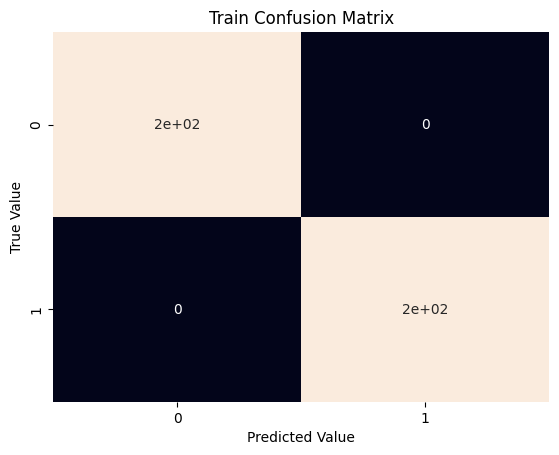

<Figure size 640x480 with 0 Axes>

Classification report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       200
         1.0       1.00      1.00      1.00       200

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

TN - True Negative :200
FP - False Positive :0
FN - False Negative :0
TP - True Positive :200
Accuracy Rate: 1.0
Misclassification Rate: 0.0
True Negative Rate: 1.0
True Positive Rate: 1.0
Precision: 1.0
F-score: 1.0


In [20]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(np.array(X_train), np.array(Y_train))
pred = knn.predict(X_test)
plot_confusion_matrix(Y_test, pred)


loss function: Hinge loss
$$l = max(0, 1-y_{i}[w* x_{i} + b])$$
$$
l= \begin{cases}
0,\quad & y_{i}[w*x_{i}+b] \ge 1\\
1-y_{i}[w*x_{i}+b],\quad & otherwise
\end{cases} 
$$

object funtion
$$J = \lambda ||W||^{2} + \frac{1}{n} \sum\limits_{i = 1}^{n}\max(0, 1 - y_{i}[wx_{i} + b])$$

$$
J_{i} = \begin{cases}
\lambda ||W||^{2},\quad & y_{i}[wx_{i}+b] \ge 1\\
\lambda ||W||^{2} + 1-y_{i}[w*x_{i}+b],\quad & otherwise
\end{cases} 
$$

* if $y_{i}[wx_{i}+b] \ge 1$

$$
\begin{align*}
\frac{\partial J}{\partial w} = 2* \lambda ||w|| \\
\frac{\partial J}{\partial b} = 0
\end{align*}
$$

* else


$$
\begin{align*}
\frac{\partial J}{\partial w} = 2* \lambda ||w|| - y_{i}*x_{i} \\
\frac{\partial J}{\partial b} = -y_i
\end{align*}
$$


In [21]:
class SVM:
    # learning_rate, lambda_param, n_iters 会影响到 SVM 的准确性，因此这个三个参数需要 tuning
    def __init__(self, learning_rate=0.001, lambda_param=0.02, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        # init weights
        # self.w = np.zeros(n_features)
        self.w = np.random.randn(n_features) / np.sqrt(n_features) # Xavier
        # self.w = np.random.randn(n_features) * 0.001  # random
        # self.w = np.random.randn(n_features) / np.sqrt(n_features/2) # he kaiming 
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [22]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

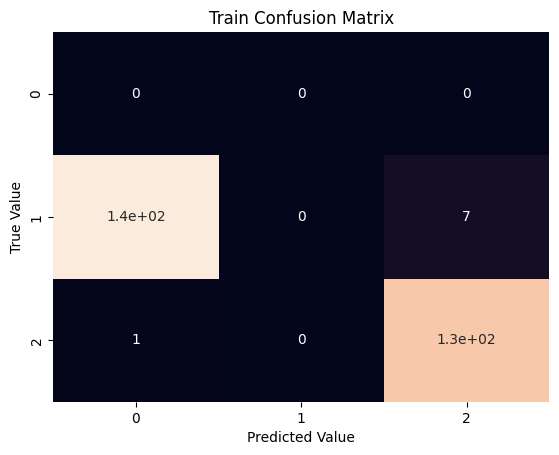

<Figure size 640x480 with 0 Axes>

Classification report: 
               precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00       147
         1.0       0.95      0.99      0.97       128

    accuracy                           0.46       275
   macro avg       0.32      0.33      0.32       275
weighted avg       0.44      0.46      0.45       275

TN - True Negative :0
FP - False Positive :0
FN - False Negative :140
TP - True Positive :0
Accuracy Rate: 0.0
Misclassification Rate: 0.509090909090909
True Negative Rate: nan
True Positive Rate: 0.0
Precision: nan
F-score: 0.0


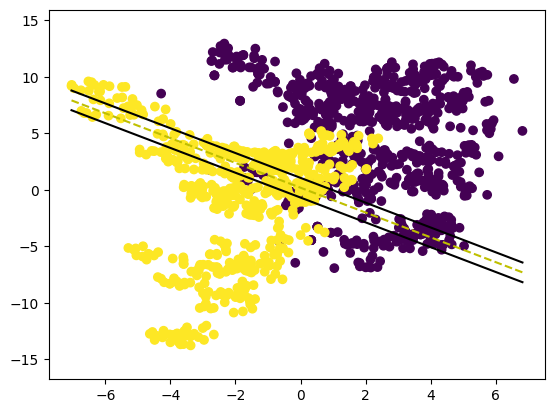

In [26]:
# Testing
if __name__ == "__main__":
    # Imports
    from sklearn.model_selection import train_test_split
    from sklearn import datasets
    from sklearn.datasets import load_iris
    import matplotlib.pyplot as plt

#     X, y = datasets.make_blobs(
#         n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
#     )
#     y = np.where(y == 0, -1, 1)

#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.2, random_state=123
#     )
    # read in banknote authentication set
    banknotes = pd.read_csv('data/data_banknote_authentication.txt', names=['variance', 'skewness', 'curtosis', 'entropy', 'class'], header=0)

    # convert to array
    X = banknotes[['variance', 'skewness', 'curtosis', 'entropy']].to_numpy()
    y = banknotes[['class']].to_numpy()[:,0]
    # create training and test datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)

    clf = SVM()
    clf.fit(X_train_std, y_train)
    predictions = clf.predict(X_test_std)
    plot_confusion_matrix(y_test, predictions)
    # target_names = ['class 0', 'class 1', 'class 2']
    # print(classification_report(y_test, predictions, target_names=target_names))
    # print('Accuracy: %.3f' % accuracy_score(y_test, predictions))
#     print("SVM binary classification accuracy: ", accuracy(y_test, predictions))
#     print("SVM binary classification recall: ", recall_score(y_test, predictions, average='weighted'))
    def visualize_svm():
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x - b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
        x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

        x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

        x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])

        plt.show()

    visualize_svm()

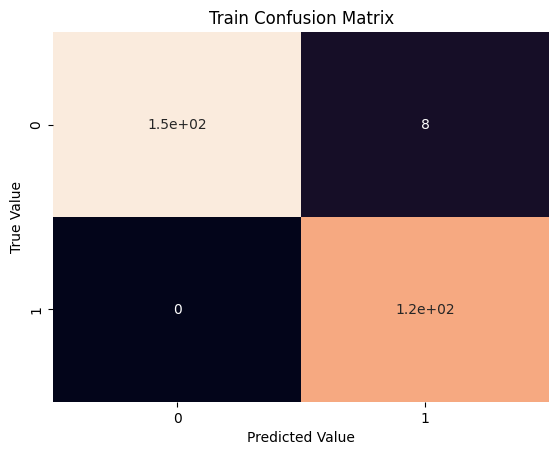

<Figure size 640x480 with 0 Axes>

Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97       154
           1       0.94      1.00      0.97       121

    accuracy                           0.97       275
   macro avg       0.97      0.97      0.97       275
weighted avg       0.97      0.97      0.97       275

TN - True Negative :146
FP - False Positive :8
FN - False Negative :0
TP - True Positive :121
Accuracy Rate: 0.9709090909090909
Misclassification Rate: 0.02909090909090909
True Negative Rate: 0.948051948051948
True Positive Rate: 1.0
Precision: 0.937984496124031
F-score: 0.968
Accuracy: 0.971


In [25]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets

banknotes = pd.read_csv('data/data_banknote_authentication.txt', names=['variance', 'skewness', 'curtosis', 'entropy', 'class'], header=0)

# convert to array
X = banknotes[['variance', 'skewness', 'curtosis', 'entropy']].to_numpy()
y = banknotes[['class']].to_numpy()[:,0]
# create training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

# Feature Scaling
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Training a SVM classifier using SVC class
clf = SVC(kernel= 'linear', random_state=1, C=0.01)
clf.fit(X_train_std, y_train)
plot_confusion_matrix(y_test, predictions)
# Mode performance

y_pred = clf.predict(X_test_std)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

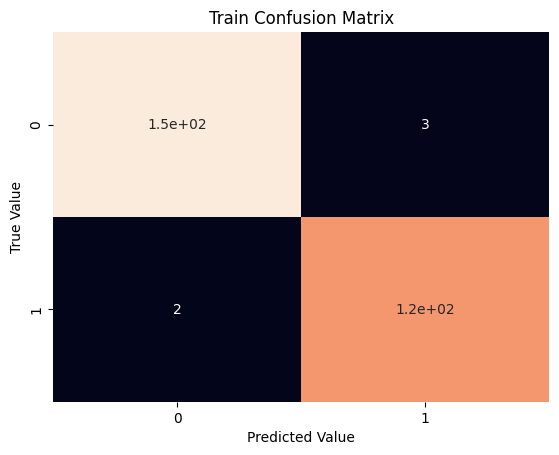

<Figure size 640x480 with 0 Axes>

Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       154
           1       0.98      0.98      0.98       121

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275

TN - True Negative :151
FP - False Positive :3
FN - False Negative :2
TP - True Positive :119
Accuracy Rate: 0.9818181818181818
Misclassification Rate: 0.01818181818181818
True Negative Rate: 0.9805194805194806
True Positive Rate: 0.9834710743801653
Precision: 0.9754098360655737
F-score: 0.9794238683127572
Accuracy: 0.982


In [31]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

banknotes = pd.read_csv('data/data_banknote_authentication.txt', names=['variance', 'skewness', 'curtosis', 'entropy', 'class'], header=0)

# convert to array
X = banknotes[['variance', 'skewness', 'curtosis', 'entropy']].to_numpy()
y = banknotes[['class']].to_numpy()[:,0]
# create training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Instantiate SVM classifier using SGDClassifier
# clf = SGDClassifier(loss='hinge')
clf = DecisionTreeClassifier(random_state=0, max_depth=10)
# Fit the model
clf.fit(X_train_std, y_train)

# Model Performance
y_pred = clf.predict(X_test_std)
plot_confusion_matrix(y_test, y_pred)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

**Note:** I observe the results of self defined SVM and svm in sklearn at uci banknote dataset. Obviously, the accuracy of SVM in sklearn is higher than my implementation. I will use the Adaboost algorithm to optimize self defined SVM. Because the Adaboost algorithm is appropriate for weak classifier which the error rate is lower 50% than strong classifier.

### Using Adaboost Boosting Self-Defined SVM

In [20]:
# Compute error rate, alpha and w
def compute_error(y, y_pred, w_i):
    '''
    Calculate the error rate of a weak classifier m. Arguments:
    y: actual target value
    y_pred: predicted value by weak classifier
    w_i: individual weights for each observation

    Note that all arrays should be the same length
    '''
    return (sum(w_i * (np.not_equal(y, y_pred)).astype(int)))/sum(w_i)

def compute_alpha(error):
    '''
    Calculate the weight of a weak classifier m in the majority vote of the final classifier. This is called
    alpha in chapter 10.1 of The Elements of Statistical Learning. Arguments:
    error: error rate from weak classifier m
    '''
    return np.log((1 - error) / error)

def update_weights(w_i, alpha, y, y_pred):
    '''
    Update individual weights w_i after a boosting iteration. Arguments:
    w_i: individual weights for each observation
    y: actual target value
    y_pred: predicted value by weak classifier
    alpha: weight of weak classifier used to estimate y_pred
    '''
    return w_i * np.exp(alpha * (np.not_equal(y, y_pred)).astype(int))

In [21]:
# Define AdaBoost class
class AdaBoost:
    def __init__(self):
        # self.w_i = None
        self.alphas = []
        self.G_M = []
        self.M = None
        self.training_errors = []
        self.prediction_errors = []

    def fit(self, X, y, M = 100):
        '''
        Fit model. Arguments:
        X: independent variables
        y: target variable
        M: number of boosting rounds. Default is 100
        '''
        # Clear before calling
        self.alphas = []
        self.training_errors = []
        self.M = M

        # Iterate over M weak classifiers
        for m in range(0, M):
            # Set weights for current boosting iteration
            if m == 0:
                w_i = np.ones(len(y)) * 1 / len(y)  # At m = 0, weights are all the same and equal to 1 / N
            else:
                w_i = update_weights(w_i, alpha_m, y, y_pred)
            # print(w_i)
            # (a) Fit weak classifier and predict labels
            G_m = SGDClassifier(loss='hinge') # Stump: Two terminal-node classification tree
            G_m.fit(X, y, sample_weight=w_i)
            y_pred = G_m.predict(X)

            self.G_M.append(G_m) # Save to list of weak classifiers

            # (b) Compute error
            error_m = compute_error(y, y_pred, w_i)
            self.training_errors.append(error_m)
            # print(error_m)

            # (c) Compute alpha
            alpha_m = compute_alpha(error_m)
            self.alphas.append(alpha_m)
            # print(alpha_m)

        assert len(self.G_M) == len(self.alphas)


    def predict(self, X):
        '''
        Predict using fitted model. Arguments:
        X: independent variables
        '''

        # Initialise dataframe with weak predictions for each observation
        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M))

        # Predict class label for each weak classifier, weighted by alpha_m
        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds.iloc[:,m] = y_pred_m

        # Estimate final predictions
        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

        return y_pred

    def error_rates(self, X, y):
        '''
        Get the error rates of each weak classifier. Arguments:
        X: independent variables
        y: target variables associated to X
        '''
        self.prediction_errors = [] # Clear before calling
        # Predict class label for each weak classifier
        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X)
            error_m = compute_error(y = y, y_pred = y_pred_m, w_i = np.ones(len(y)))
            self.prediction_errors.append(error_m)


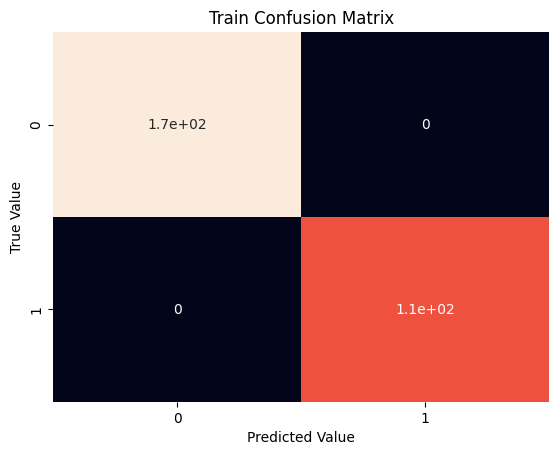

<Figure size 640x480 with 0 Axes>

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       168
           1       1.00      1.00      1.00       107

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

TN - True Negative :168
FP - False Positive :0
FN - False Negative :0
TP - True Positive :107
Accuracy Rate: 1.0
Misclassification Rate: 0.0
True Negative Rate: 1.0
True Positive Rate: 1.0
Precision: 1.0
F-score: 1.0
Accuracy: 1.000


In [34]:
if __name__ == "__main__":
    # read in banknote authentication set
    banknotes = pd.read_csv('data/data_banknote_authentication.txt', names=['variance', 'skewness', 'curtosis', 'entropy', 'class'], header=0)

    # convert to array
    X = banknotes[['variance', 'skewness', 'curtosis', 'entropy']].to_numpy()
    y = banknotes[['class']].to_numpy()[:,0]
    # create training and test datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)

    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train_std, y_train)
    y_pred = clf.predict(X_test_std)
    plot_confusion_matrix(y_test, y_pred)
    print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))


实验内容:

(1) 从零实现 SVM，accuracy 只能达到 50% 左右;

(2) 自己手写了 Adaboost，性能不升反降，没有达到任何优化效果;

(3) 直接调用 sklearn 中的 Adaboost，accuracy 100%，效果非常好.